<a href="https://colab.research.google.com/github/denisbebrovich/ML-DS/blob/main/MO%D0%B4%D0%B73.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Предварительная обработка данных, EDA и прочее представлено в ноутбуке [МОдз1](https://colab.research.google.com/drive/1w9Er_B6u6Wt-PEptbl9mZ-27SWZ17csi?usp=sharing#scrollTo=ai9xNAitLRUW)


---


Напомню, что в датасете указана информация об удовлетворенностью своей работой жителей США по критериям и итоговая оценка от 1 до 5, которая является тагретной переменной


#импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.metrics import accuracy_score, precision_score, recall_score
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# открываем файл

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/glassdor_norm.csv', delimiter = ',')
df

,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,day,month,year,overall
0,0.371667,-0.602106,-1.060046,-0.548583,-0.134175,-1.126001,-1.523631,-0.180489,-1.243051,-0.500995,-1.125080,2
1,-0.435397,-1.757818,-1.060046,-1.876647,0.599324,-1.126001,-1.523631,-0.180489,-0.440152,1.510099,-1.125080,2
2,-1.765328,-1.757818,-1.737748,-1.876647,-1.601212,-1.126001,-1.523631,-1.054130,1.336289,-1.702864,-0.742651,1
3,-1.157151,-0.602106,-1.060046,-1.287863,-0.134175,-1.126001,-1.523631,-0.180489,0.133422,-0.500995,-0.742651,5
4,-1.157151,-1.757818,-1.060046,-1.876647,-1.601212,-1.126001,-1.523631,-1.054130,0.857410,-0.500995,-0.742651,1
...,...,...,...,...,...,...,...,...,...,...,...,...
78147,0.371667,1.097816,-0.315610,-0.548583,-0.134175,0.762872,0.950898,-0.180489,-1.566673,-0.193836,-1.820608,4
78148,1.248749,0.189624,-1.060046,0.309266,-0.867685,-1.126001,-0.036809,-0.180489,-1.399104,-0.193836,-1.820608,2
78149,-0.435397,-1.260705,0.475768,0.309266,-0.134175,-1.126001,0.950898,-0.180489,-1.399104,-0.193836,-1.820608,3
78150,-0.435397,0.189624,-0.315610,0.309266,0.599324,0.762872,0.950898,-0.180489,-1.243051,-0.193836,-1.820608,4


# модель

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
trainX, testX, trainY, testY = train_test_split(df.drop(columns = 'overall'), df['overall'], train_size = 0.8, test_size = 0.2, random_state=42)
trainX, testX, trainY, testY

(       work_life_balance  culture_values  career_opp  comp_benefits  \
 76545          -1.765328       -0.602106    0.475768       0.309266   
 74631          -0.435397        1.097816   -0.315610      -1.287863   
 32156          -0.435397        1.097816   -0.315610       1.267658   
 35066           1.248749        0.189624    1.303992       1.267658   
 53409          -0.435397        0.189624   -0.315610      -0.548583   
 ...                  ...             ...         ...            ...   
 6265           -1.157151       -0.602106    0.475768      -1.287863   
 54886           1.248749        1.097816    0.475768      -0.548583   
 76820          -1.765328       -0.602106   -1.060046      -0.548583   
 860             0.371667       -1.260705   -1.737748      -1.876647   
 15795           0.371667        0.189624    1.303992       0.309266   
 
        senior_mgmt  recommend  ceo_approv   outlook       day     month  \
 76545    -1.601212  -1.126001   -0.873816 -1.054130  0.13

In [ ]:
model = LogisticRegression()
trained_model = model.fit(trainX, trainY)
prediction = trained_model.predict(testX)
prediction

array([3, 4, 5, ..., 4, 5, 2])

# артефакты

Веса модели

In [ ]:
weights_df = pd.DataFrame(model.coef_, columns=[df.columns[i] for i in range(testX.shape[1])])
weights_df['intercept'] = model.intercept_
weights_df.index = [i for i in range(1, model.coef_.shape[0]+1)]

print(weights_df)

   work_life_balance  culture_values  career_opp  comp_benefits  senior_mgmt  \
1          -0.628013       -1.526573   -1.427051      -0.670520    -1.360973   
2          -0.213333       -0.638725   -0.638355      -0.385603    -0.707577   
3          -0.012333       -0.029661    0.016023      -0.133158     0.048923   
4           0.264869        0.676158    0.639431       0.315028     0.670963   
5           0.588810        1.518801    1.409951       0.874252     1.348665   

   recommend  ceo_approv   outlook       day     month      year  intercept  
1  -0.567493    0.098632 -0.183993  0.028719 -0.010855 -0.100218  -4.987095  
2  -0.583687    0.086237  0.038533 -0.005491 -0.041904 -0.148839  -1.035775  
3   0.081914    0.001457 -0.023524 -0.000636 -0.008705 -0.013586   2.135042  
4   0.577324   -0.103090 -0.006202 -0.009487  0.009021  0.081723   2.831894  
5   0.491942   -0.083236  0.175187 -0.013106  0.052443  0.180919   1.055933  


метрики

In [ ]:
Accuracy = accuracy_score(testY, prediction)
Precision = precision_score(testY, prediction, average = 'weighted')
Recall = recall_score(testY, prediction, average = 'weighted')
print('Accuracy:', Accuracy, '\n', 'Precision:', Precision, '\n', 'Recall:', Recall)

Accuracy: 0.6454481479112021 
 Precision: 0.6398670787377364 
 Recall: 0.6454481479112021


метрики не наилучшие, нужно улучшать

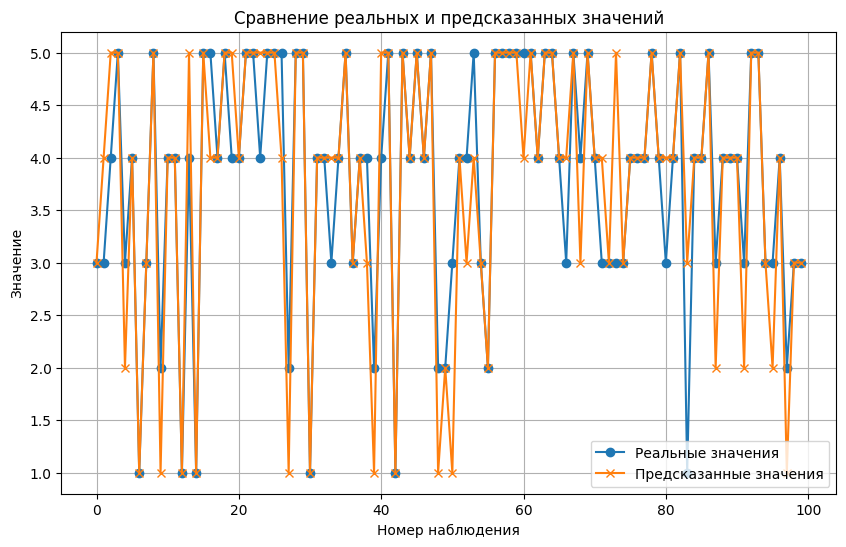

In [ ]:
import matplotlib.pyplot as plt
ind = np.arange(len(testY))[:100]

plt.figure(figsize=(10, 6))

# Рисуем реальные значения
plt.plot(ind, testY[:100], label='Реальные значения', marker='o')

# Рисуем предсказанные значения
plt.plot(ind, prediction[:100], label='Предсказанные значения', marker='x')

# Добавляем заголовок и метки осей
plt.title('Сравнение реальных и предсказанных значений')
plt.xlabel('Номер наблюдения')
plt.ylabel('Значение')

# Добавляем легенду
plt.legend()

# Показываем график
plt.grid()
plt.show()

# улучшение модели

проверим переобучение

In [ ]:
prediction1 = model.predict(trainX)
trainAccuracy = accuracy_score(trainY, prediction1)
trainPrecision = precision_score(trainY, prediction1, average = 'weighted')
trainRecall = recall_score(trainY, prediction1, average = 'weighted')
print('Accuracy:', trainAccuracy, '\n', 'Precision:', trainPrecision, '\n', 'Recall:', trainRecall)

Accuracy: 0.6545000879704419 
 Precision: 0.6500168995087225 
 Recall: 0.6545000879704419


показатели примерно те же, а значит переобучения нет

пробуем полиномы

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2
poly_features2 = PolynomialFeatures(degree)
trainX_poly2 = poly_features2.fit_transform(trainX)
testX_poly2 = poly_features2.transform(testX)

In [ ]:
model_poly2 = LogisticRegression().fit(trainX_poly2, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
prediction2 = model_poly2.predict(testX_poly2)
prediction2

array([3, 4, 5, ..., 4, 5, 2])

In [ ]:
Accuracy2 = accuracy_score(testY, prediction2)
Precision2 = precision_score(testY, prediction2, average = 'weighted')
Recall2 = recall_score(testY, prediction2, average = 'weighted')
print('Accuracy:', Accuracy2, '\n', 'Precision:', Precision2, '\n', 'Recall:', Recall2)

Accuracy: 0.6635531955729 
 Precision: 0.6655699237071024 
 Recall: 0.6635531955729


стало чуть лучше, попробуем повысить степень

In [ ]:
degree = 3
poly_features3 = PolynomialFeatures(degree)
trainX_poly3 = poly_features3.fit_transform(trainX)
testX_poly3 = poly_features3.transform(testX)

In [ ]:
model_poly3 = LogisticRegression().fit(trainX_poly3, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
prediction3 = model_poly3.predict(testX_poly3)
prediction3

array([3, 4, 5, ..., 4, 5, 3])

In [ ]:
Accuracy3 = accuracy_score(testY, prediction3)
Precision3 = precision_score(testY, prediction3, average = 'weighted')
Recall3 = recall_score(testY, prediction3, average = 'weighted')
print('Accuracy:', Accuracy3, '\n', 'Precision:', Precision3, '\n', 'Recall:', Recall3)

Accuracy: 0.6664320900774102 
 Precision: 0.6677327596472877 
 Recall: 0.6664320900774102


еще лучше, пробуем повышать

In [ ]:
degree = 4
poly_features4 = PolynomialFeatures(degree)
trainX_poly4 = poly_features4.fit_transform(trainX)
testX_poly4 = poly_features4.transform(testX)

In [ ]:
model_poly4 = LogisticRegression().fit(trainX_poly4, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
prediction4 = model_poly4.predict(testX_poly4)
prediction4

array([3, 4, 5, ..., 4, 5, 3])

In [ ]:
Accuracy4 = accuracy_score(testY, prediction4)
Precision4 = precision_score(testY, prediction4, average = 'weighted')
Recall4 = recall_score(testY, prediction4, average = 'weighted')
print('Accuracy:', Accuracy4, '\n', 'Precision:', Precision4, '\n', 'Recall:', Recall4)

Accuracy: 0.6613140554027254 
 Precision: 0.6625003795074527 
 Recall: 0.6613140554027254


стало чуть хуже, оставим 3 степень

In [ ]:
Accuracy3 = accuracy_score(testY, prediction3)
Precision3 = precision_score(testY, prediction3, average = 'weighted')
Recall3 = recall_score(testY, prediction3, average = 'weighted')
print('Accuracy:', Accuracy3, '\n', 'Precision:', Precision3, '\n', 'Recall:', Recall3)

Accuracy: 0.6664320900774102 
 Precision: 0.6677327596472877 
 Recall: 0.6664320900774102


# SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(max_iter=7000, alpha=0.001)
sgdc.fit(trainX, trainY)
sgdcPred = sgdc.predict(testX)

In [ ]:
sgdcAccuracy = accuracy_score(testY, sgdcPred)
sgdcPrecision = precision_score(testY, sgdcPred, average = 'weighted')
sgdcRecall = recall_score(testY, sgdcPred, average = 'weighted')
print('Accuracy:', sgdcAccuracy, '\n', 'Precision:', sgdcPrecision, '\n', 'Recall:', sgdcRecall)

Accuracy: 0.5326594587678332 
 Precision: 0.4877673612650112 
 Recall: 0.5326594587678332


показатели хуже чем в основной модели

попробуем подобрать показатели модели с помощью грид серча

In [ ]:
from sklearn.model_selection import GridSearchCV
# Определите диапазон значений для max_iter и alpha
param_grid = {
    'max_iter': [1000, 3000, 5000, 7000, 10000],
    'alpha': [0.001, 0.01, 0.1, 0.5, 1]
}

# Создайте экземпляр SGDClassifier
sgdc = SGDClassifier()

# Создайте экземпляр GridSearchCV
grid_search = GridSearchCV(sgdc, param_grid, cv=5, scoring='accuracy')

# Пробегите по параметрам и оцените качество модели
grid_search.fit(trainX, trainY)

# Выведите лучшие параметры и соответствующую им точность
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность:", -grid_search.best_score_)

# Создайте модель с лучшими параметрами и оцените ее качество
best_sgdc = grid_search.best_estimator_
best_sgdcPred = best_sgdc.predict(testX)

acc_best_sgdc = accuracy_score(testY, best_sgdcPred)
prec_best_sgdc = precision_score(testY, best_sgdcPred, average = 'weighted')
rec_best_sgdc = recall_score(testY, best_sgdcPred, average = 'weighted')

print('Accuracy:', acc_best_sgdc, '\n', 'Precision:', prec_best_sgdc, '\n', 'Recall:', rec_best_sgdc)

Лучшие параметры: {'alpha': 0.001, 'max_iter': 3000}
Лучшая точность: -0.5496238523144805
Accuracy: 0.5624720107478728 
 Precision: 0.5220688760890637 
 Recall: 0.5624720107478728


так же не очень результаты? (хоть и стало лучше)

# вывод


наша модели лог регрессии не так уж и плоха, хотя метрики не впечетляют, полиномы помогают их увеличить, а вот sgdc не очень...

# синтетика

##создание датасета

In [ ]:
from sklearn.datasets import make_moons
sinX, sinY = make_moons(n_samples = 1000, noise = 0.1, random_state= 42)
x_train, x_test, y_train, y_test = train_test_split(sinX, sinY, test_size=0.2, random_state=42)
y_test

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1])

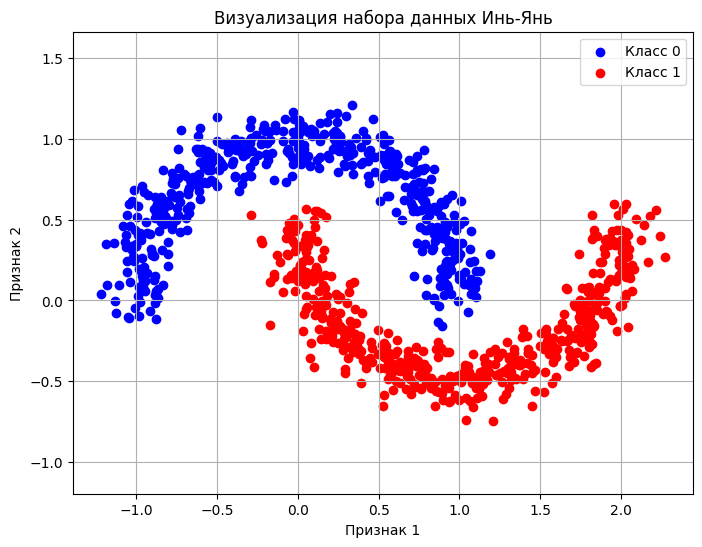

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(sinX[sinY == 0][:, 0], sinX[sinY == 0][:, 1], color='blue', label='Класс 0')
plt.scatter(sinX[sinY == 1][:, 0], sinX[sinY == 1][:, 1], color='red', label='Класс 1')
plt.title('Визуализация набора данных Инь-Янь')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

##модель и ее предсказание

In [ ]:
sinModel = LogisticRegression().fit(x_train, y_train)
sinPredict = sinModel.predict(x_test)
sinPredict

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0])

##метрики

In [ ]:
sinAccuracy = accuracy_score(y_test, sinPredict)
sinPrecision = precision_score(y_test, sinPredict)
sinRecall = recall_score(y_test, sinPredict)
print('Accuracy:', sinAccuracy, '\n', 'Precision:', sinPrecision, '\n', 'Recall:', sinRecall)

Accuracy: 0.88 
 Precision: 0.8653846153846154 
 Recall: 0.9


метрики на данном этапе уже очень хороши

##веса модели

In [ ]:
sinWeights = sinModel.coef_[0]
sinWeights

array([ 1.18137404, -4.84664169])

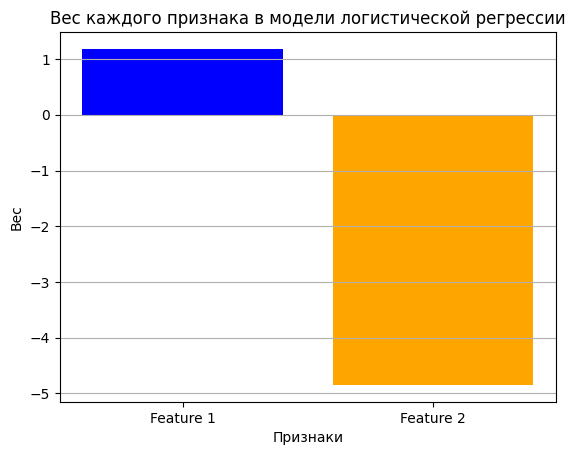

In [ ]:
features = ['Feature 1', 'Feature 2']
plt.bar(features, sinWeights, color=['blue', 'orange'])
plt.xlabel('Признаки')
plt.ylabel('Вес')
plt.title('Вес каждого признака в модели логистической регрессии')
plt.grid(axis='y')
plt.show()

##полиномы

In [ ]:
degree = 2
sinPoly_features = PolynomialFeatures(degree = degree)
x_train_poly = sinPoly_features.fit_transform(x_train)
x_test_poly = sinPoly_features.transform(x_test)
polyModel2 = LogisticRegression().fit(x_train_poly, y_train)
polyPredict2 = polyModel2.predict(x_test_poly)
polyPredict2

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0])

In [ ]:
polyAccuracy2 = accuracy_score(y_test, polyPredict2)
polyPrecision2 = precision_score(y_test, polyPredict2)
polyRecall2 = recall_score(y_test, polyPredict2)
print('Accuracy:', polyAccuracy2, '\n', 'Precision:', polyPrecision2, '\n', 'Recall:', polyRecall2)

Accuracy: 0.885 
 Precision: 0.8666666666666667 
 Recall: 0.91


стало чуть чуть лучше, проверим что будет при уввеличении степени

In [ ]:
degree = 3
sinPoly_features = PolynomialFeatures(degree = degree)
x_train_poly = sinPoly_features.fit_transform(x_train)
x_test_poly = sinPoly_features.transform(x_test)
polyModel3 = LogisticRegression().fit(x_train_poly, y_train)
polyPredict3 = polyModel3.predict(x_test_poly)
polyPredict3

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1])

In [ ]:
polyAccuracy3 = accuracy_score(y_test, polyPredict3)
polyPrecision3 = precision_score(y_test, polyPredict3)
polyRecall3 = recall_score(y_test, polyPredict3)
print('Accuracy:', polyAccuracy3, '\n', 'Precision:', polyPrecision3, '\n', 'Recall:', polyRecall3)

Accuracy: 0.99 
 Precision: 0.99 
 Recall: 0.99


очень хорошо но проверим можно ли лучше

In [ ]:
degree = 4
sinPoly_features = PolynomialFeatures(degree = degree)
x_train_poly = sinPoly_features.fit_transform(x_train)
x_test_poly = sinPoly_features.transform(x_test)
polyModel4 = LogisticRegression().fit(x_train_poly, y_train)
polyPredict4 = polyModel4.predict(x_test_poly)
polyPredict4

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1])

In [ ]:
polyAccuracy4 = accuracy_score(y_test, polyPredict4)
polyPrecision4 = precision_score(y_test, polyPredict4)
polyRecall4 = recall_score(y_test, polyPredict4)
print('Accuracy:', polyAccuracy4, '\n', 'Precision:', polyPrecision4, '\n', 'Recall:', polyRecall4)

Accuracy: 1.0 
 Precision: 1.0 
 Recall: 1.0


результат идеален

##веса с полиномами

In [ ]:
sinPolyWeights = polyModel4.coef_[0]
sinPolyWeights

array([ 0.00855006, -0.49310259, -3.4265649 , -6.25559543, -1.40479007,
       -0.82714391,  1.80182492, -2.40836438,  1.04530741, -2.0713205 ,
        1.46761643, -0.16880825,  0.27419172, -0.02645375, -1.44017133])

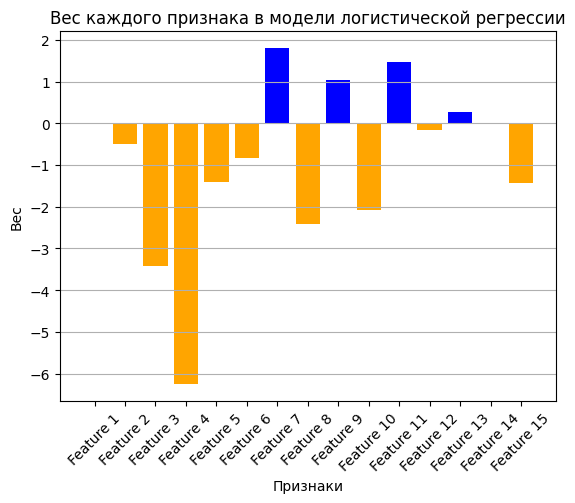

In [ ]:
features = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9', 'Feature 10', 'Feature 11', 'Feature 12', 'Feature 13', 'Feature 14', 'Feature 15']
plt.bar(features, sinPolyWeights, color=['orange' if weight < 0 else 'blue' for weight in sinPolyWeights])
plt.xlabel('Признаки')
plt.ylabel('Вес')
plt.title('Вес каждого признака в модели логистической регрессии')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

##вывод

на синтетических данных инь янь модель себя показала очень хорошо, а после добавления полинома и вовсе выдала стопроцентный результат.